# Working with Python: functions and modules

## Session 4: Using third party libraries

- [Matplotlib](#Matplotlib)
- [Exercise 4.1](#Exercise-4.1)
- [BioPython](#BioPython)
- [Working with sequences](#Working-with-sequences)
- [Connecting with biological databases](#Connecting-with-biological-databases)
- [Exercise 4.2](#Exercise-4.2)

## Matplotlib

[matplotlib](http://matplotlib.org/) is probably the single most used Python package for graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats.

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. 

Let's start with a very simple plot.

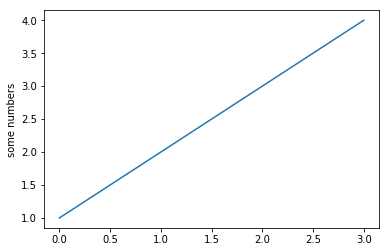

In [1]:
import matplotlib.pyplot as mpyplot
mpyplot.plot([1,2,3,4])
mpyplot.ylabel('some numbers')
mpyplot.show()

`plot()` is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

In [2]:
mpyplot.plot([1,2,3,4], [1,4,9,16])

For every x, y pair of arguments, there is an **optional third argument** which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is `b-`, which is a solid blue line. For example, to plot the above with red circles, you would chose `ro`.

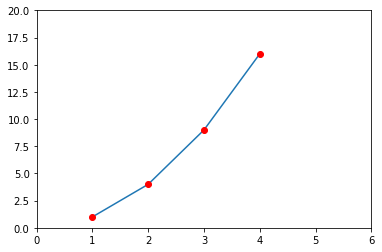

In [3]:
import matplotlib.pyplot as mpyplot
mpyplot.plot([1,2,3,4], [1,4,9,16], 'ro')
mpyplot.axis([0, 6, 0, 20])
mpyplot.show()

`matplotlib` has a few methods in the **`pyplot` module** that make creating common types of plots faster and more convenient because they automatically create a Figure and an Axes object. The most widely used are:

- [mpyplot.bar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) – creates a bar chart.
- [mpyplot.boxplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot) – makes a box and whisker plot.
- [mpyplot.hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) – makes a histogram.
- [mpyplot.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) – creates a line plot.
- [mpyplot.scatter](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) – makes a scatter plot.

Calling any of these methods will automatically setup `Figure` and `Axes` objects, and draw the plot. Each of these methods has different parameters that can be passed in to modify the resulting plot.

The [Pyplot tutorial](http://matplotlib.org/users/pyplot_tutorial.html) is where these simple examples above are coming from. More could be learn from it if you wish during your own time.

Let's now try to plot the GC content along the chain we have calculated during the previous session, while solving the Exercises 3.3 and 3.4.

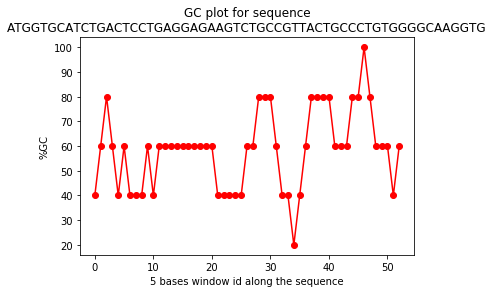

In [15]:
seq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
gc = [40.0, 60.0, 80.0, 60.0, 40.0, 60.0, 40.0, 40.0, 40.0, 60.0, 
      40.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 
      60.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0, 60.0, 80.0, 80.0, 
      80.0, 60.0, 40.0, 40.0, 20.0, 40.0, 60.0, 80.0, 80.0, 80.0, 
      80.0, 60.0, 60.0, 60.0, 80.0, 80.0, 100.0, 80.0, 60.0, 60.0, 
      60.0, 40.0, 60.0]
window_ids = range(len(gc))

import matplotlib.pyplot as mpyplot
mpyplot.plot(window_ids, gc, 'ro-' )
mpyplot.xlabel('5 bases window id along the sequence')
mpyplot.ylabel('%GC')
mpyplot.title('GC plot for sequence\n' + seq)
mpyplot.show()

## Exercise 4.1

Re-use the GapMinder dataset to plot, in Jupyter using Matplotlib, from the world data the life expectancy against GDP per capita for 1957 and 2007 using a scatter plot, add title to your graph as well as a legend.

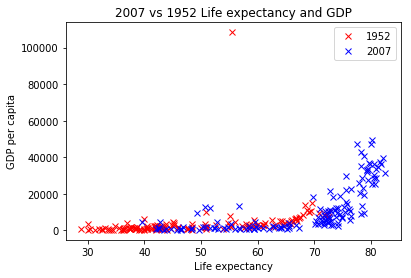

In [46]:
import pandas as pd 

#import into pandas 
data = pd.read_csv( 'data/gapminder.txt', sep = '\t') 
    
    
mpyplot.plot(list(data['lifeExp'][data['year'] == 1952]), list(data['gdpPercap'][data['year'] == 1952]), 'rx', label = '1952' )
mpyplot.plot(list(data['lifeExp'][data['year'] == 2007]), list(data['gdpPercap'][data['year'] == 2007]), 'bx', label = '2007')
mpyplot.xlabel('Life expectancy')
mpyplot.ylabel('GDP per capita')
mpyplot.title('2007 vs 1952 Life expectancy and GDP')
mpyplot.legend()
mpyplot.show()



## BioPython

The goal of Biopython is to make it as easy as possible to use Python for bioinformatics by creating high-quality, reusable modules and classes. Biopython features include parsers for various Bioinformatics file formats (BLAST, Clustalw, FASTA, Genbank,...), access to online services (NCBI, Expasy,...), interfaces to common and not-so-common programs (Clustalw, DSSP, MSMS...), a standard sequence class, various clustering modules, a KD tree data structure etc. and documentation as well as a tutorial: http://biopython.org/DIST/docs/tutorial/Tutorial.html.

## Working with sequences

We can create a sequence by defining a `Seq` object with strings. `Bio.Seq()` takes as input a string and converts in into a Seq object. We can print the sequences, individual residues, lengths and use other functions to get summary statistics.  

In [16]:
# Creating sequence
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
print(my_seq)
print(my_seq[10])
print(my_seq[1:5])
print(len(my_seq))
print(my_seq.count("A"))

AGTACACTGGT
T
GTAC
11
3


We can use functions from `Bio.SeqUtils` to get idea about a sequence 

In [17]:
# Calculate the molecular weight
from Bio.SeqUtils import GC, molecular_weight
print(GC(my_seq))
print(molecular_weight(my_seq))

45.45454545454545
3436.1957000000007


One letter code protein sequences can be converted into three letter codes using `seq3` utility 

In [18]:
from Bio.SeqUtils import seq3
print(seq3(my_seq))

AlaGlyThrAlaCysAlaCysThrGlyGlyThr


Alphabets defines how the strings are going to be treated as sequence object. `Bio.Alphabet` module defines the available alphabets for Biopython. `Bio.Alphabet.IUPAC` provides basic definition for DNA, RNA and proteins. 

In [19]:
from Bio.Alphabet import IUPAC
my_dna = Seq("AGTACATGACTGGTTTAG", IUPAC.unambiguous_dna)
print(my_dna)
print(my_dna.alphabet)

AGTACATGACTGGTTTAG
IUPACUnambiguousDNA()


In [ ]:
my_dna.complement()

In [ ]:
my_dna.reverse_complement()

In [ ]:
my_dna.translate()

### Parsing sequence file format: FASTA files

Sequence files can be parsed and read the same way we read other files. 

In [ ]:
with open( "data/glpa.fa" ) as f:
    print(f.read())

Biopython provides specific functions to allow parsing/reading sequence files. 

In [ ]:
# Reading FASTA files
from Bio import SeqIO

with open("data/glpa.fa") as f:
    for protein in SeqIO.parse(f, 'fasta'):
        print(protein.id)
        print(protein.seq)

Sequence objects can be written into files using file handles with the function `SeqIO.write()`. We need to provide the name of the output sequence file and the sequence file format. 

In [21]:
# Writing FASTA files
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC

sequence = 'MYGKIIFVLLLSEIVSISASSTTGVAMHTSTSSSVTKSYISSQTNDTHKRDTYAATPRAHEVSEISVRTVYPPEEETGERVQLAHHFSEPEITLIIFG'
 
seq = Seq(sequence, IUPAC.protein)
protein = [SeqRecord(seq, id="THEID", description='a description'),]

with open( "biopython.fa", "w") as f:
    SeqIO.write(protein, f, 'fasta')

with open( "biopython.fa" ) as f:
    print(f.read())

>THEID a description
MYGKIIFVLLLSEIVSISASSTTGVAMHTSTSSSVTKSYISSQTNDTHKRDTYAATPRAH
EVSEISVRTVYPPEEETGERVQLAHHFSEPEITLIIFG



## Connecting with biological databases

Sequences can be searched and downloaded from public databases. 

In [22]:
# Read FASTA file from NCBI GenBank
from Bio import Entrez

Entrez.email = 'A.N.Other@example.com' # Always tell NCBI who you are
handle = Entrez.efetch(db="nucleotide", id="71066805", rettype="gb")
seq_record = SeqIO.read(handle, "gb")
handle.close()

print(seq_record.id, 'with', len(seq_record.features), 'features')
print(seq_record.seq)
print(seq_record.format("fasta"))

DQ091202.1 with 6 features
TTCTGGGCCTCAGTTTCCTCATTTGTATAATAACAGAATTGGAGAGTAAATTCTTAAGAGGCTTACCAGGCTGTAATTCTAAAAAAAATGCATAAATAAACTTGCCAAGGCAGATGTTTTTAGCAGCAATTCCTGAAAGAAACGGGACCAGGAGATAAGTAGAGAAAGAGTGAAGGTCTGAAATCAAACTAATAAGACAGTCCCAGACTGTCAAGGAGAGGTATGGCTGTCATCATTCAGGCCTCACCCTGCAGAACCACACCCTGGCCTTGGCCAATCTGCTCACAAGAGCAAAAAGGGCAGGACCAGGGTTGGGCATATAAGGAAGAGTAGTGCCAGCTGCTGTTTACACTCACTTCTGACACAACTGTGTTGACTAGCAACTACCCAATCAGACACCATGGTGAATCTGACTGCTGCTGAGAAGACACAAGTCACCAACCTGTGGGGCAAGGTGAATGTGAAAGAGCTTGGTGGTGAGGCCCTGAGCAGGTTTGTATCTAGGTTGCAAGGTAGACTTAAGGAGGGTTGAGTGGGGCTGGGCATGTGGAGACAGAACAGTCTCCCAGTTTCTGACAGGCACTGACTTCCTCTGCACCSTGTGGTGCTTTCACCTTCAGGCTGCTGGTGGTCTACCCATGGACCCGGAGGTTCTTTGAACACTTTGGGGACCTGTCCACTGCTGACGCTGTCCTGCACAACGCTAAAGTGCTGGCCCATGGCGAGAAAGTGTTGACCTCCTTTGGTGAGGGCCTGAAGCACCTGGACAACCTCAAGGGCACCTTTGCCGATCTGAGCGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAATTTCAGGGTGAGTCTAGGAGACACTCTATTTTTTCTTTTCACTTTGTAGTCTTTCACTGTGATTATTTTGCTTATTTGAATTTCCTCTGTATCTCTTTTTACTCGACTATGTTTCATCATTTAGTGTTTTTTCAACT

In [ ]:
# Read SWISSPROT record
from Bio import ExPASy

handle = ExPASy.get_sprot_raw('HBB_HUMAN')
prot_record = SeqIO.read(handle, "swiss")
handle.close()

print(prot_record.description)
print(prot_record.seq)

## Exercise 4.2

- Retrieve a FASTA file named `data/sample.fa` using BioPython and answer the following questions:
  - How many sequences are in the file?
  - What are the IDs and the lengths of the longest and the shortest sequences?
  - Select sequences longer than 500bp. What is the average length of these sequences?
  - Calculate and print the percentage of GC in each of the sequences.
  - Write the newly created sequences into a FASTA file named `long_sequences.fa` 

## Congratulation! You reached the end! 